# **Séries Temporais**

* ### **O que é uma Série Temporal?**

Série temporal é um conjunto de dados armazenados em relação ao tempo deles.

O tempo pode ser registrado em:
- segundos;
- minutos;
- horas;
- dias;
- semanas;
- meses;
- trimestres;
- anos;
- etc...

##### **Exemplo:** Temperatura por Data/Hora

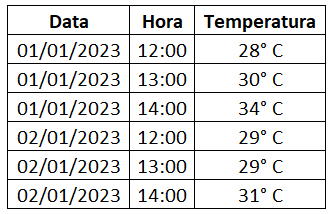

In [24]:
from IPython.display import Image
Image(filename='imagens/exemplo_serie_temporal.png')

Outros exemplos:
- Receita Bruta por mês
- Lucro por semana
- Clientes por dia
- Vendas por hora
- Variação da cotação do Dolar por minuto
- etc...

Análise matemáticas e estatísticas são realizadas para encontrar padrões ocultos e insights significativos. 

As técnicas de modelagem de séries temporais são usadas para entender padrões em histórico de dados (do passado) e estimar/prever tendências futuras. 

Este artigo é uma introdução aos tipos de dados de séries temporais, seus componentes e maneiras de as decompor.

* ### **Tendências**

Tendência é um padrão observado ao longo de um período de tempo e representa a taxa média de mudança em relação ao tempo. 

Ela geralmente mostra se os dados tendem a aumentar ou diminuir no longo prazo. 

Nem sempre é necessário que o aumento ou diminuição estejam na mesma direção durante todo o período de tempo. 

Para exemplificar, coletaremos os dados históricos de temperatura em Jurerê Internacional desde Junho-22 (inverno) até Março-23 (verão).

,Data,Temperatura °C
0,2022-06-01,14.3
1,2022-06-02,14.8
2,2022-06-03,15.2
3,2022-06-04,15.5
4,2022-06-05,18.0


,Data,Temperatura °C
272,2023-02-28,24.5
273,2023-03-01,24.2
274,2023-03-02,24.3
275,2023-03-03,24.6
276,2023-03-04,25.1


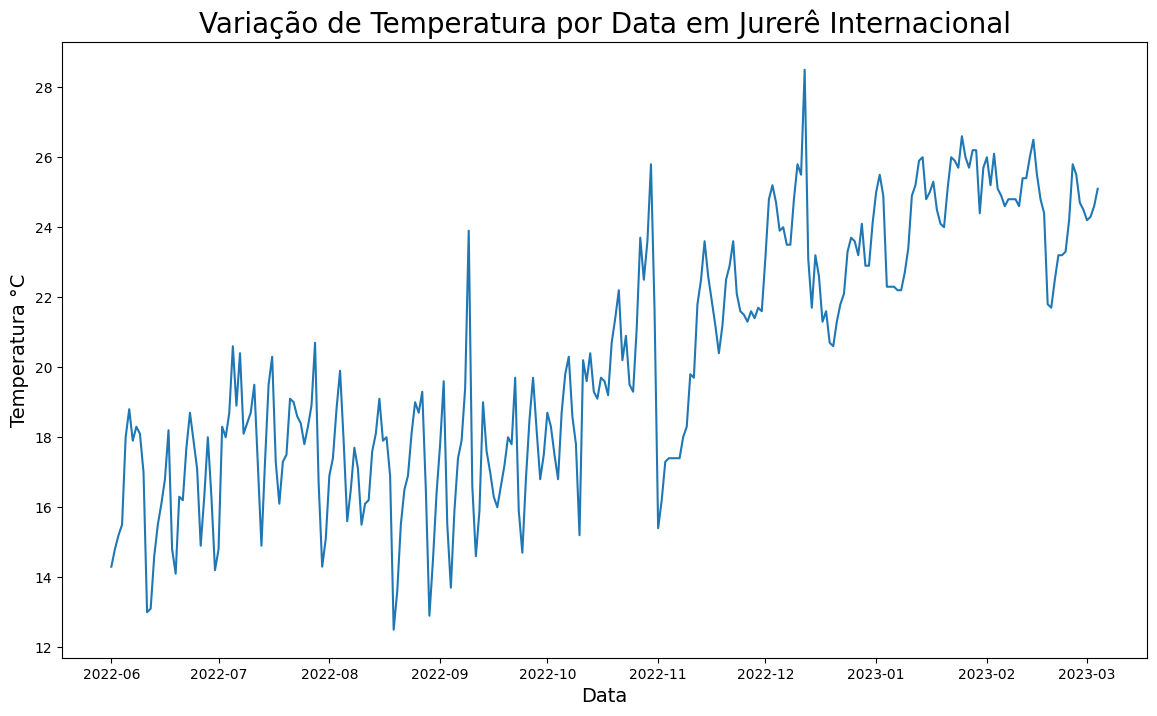

In [25]:
from datetime import datetime
from meteostat import Point, Daily, Hourly
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data_inicio = datetime(2022, 6, 1)
data_fim = datetime(2023, 3, 31)
latitude_jurere_open_shopping = -27.439991
longitude_jurere_open_shopping = -48.501263
coordenadas_jurere = Point(latitude_jurere_open_shopping, longitude_jurere_open_shopping, 0)
temperatura_jurere = Daily(coordenadas_jurere, data_inicio, data_fim)
temperatura_jurere = temperatura_jurere.fetch()
temperatura_jurere = temperatura_jurere.reset_index()
temperatura_jurere = temperatura_jurere[['time', 'tavg']]
temperatura_jurere.columns = ['Data', 'Temperatura °C']
display(temperatura_jurere.head())
display(temperatura_jurere.tail())
x = temperatura_jurere['Data']
y = temperatura_jurere['Temperatura °C']
plt.figure(figsize=(14, 8))
plt.title('Variação de Temperatura por Data em Jurerê Internacional', fontsize=18)
plt.plot(x, y)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Temperatura °C', fontsize=14);

Podemos observar que a temperatura tende a aumentar conforme o verão chega e tenderá a diminuir após abril-23, quando o inverno se aproxima.

Da mesma forma, podemos coletar a temperatura na mesma região, dessa vez a cada hora. 

Utilizaremos as datas de 01/01/2023 à 07/01/2023 (23:59 horas).

,Data/Hora,Temperatura °C
0,2023-01-01 00:00:00,23.7
1,2023-01-01 01:00:00,23.3
2,2023-01-01 02:00:00,23.4
3,2023-01-01 03:00:00,23.0
4,2023-01-01 04:00:00,22.8


,Data/Hora,Temperatura °C
163,2023-01-07 19:00:00,24.2
164,2023-01-07 20:00:00,23.8
165,2023-01-07 21:00:00,23.2
166,2023-01-07 22:00:00,22.2
167,2023-01-07 23:00:00,21.8


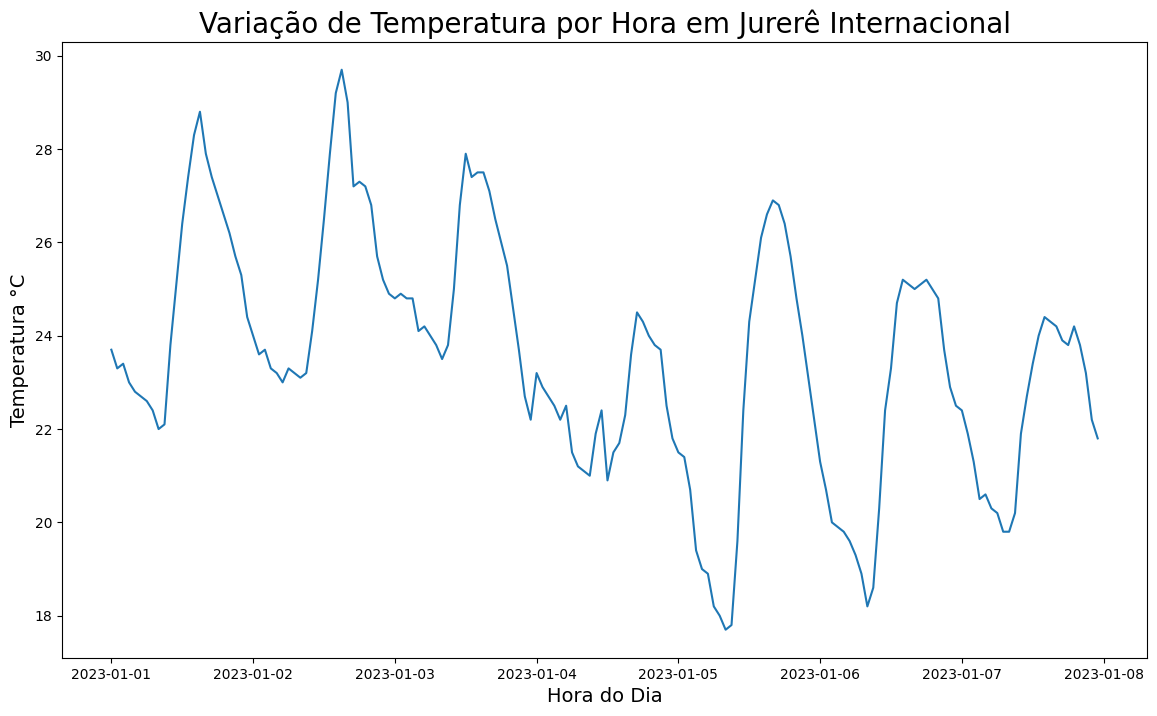

In [26]:
data_inicio = datetime(2023, 1, 1)
data_fim = datetime(2023, 1, 7, 23, 59)
latitude_jurere_open_shopping = -27.439991
longitude_jurere_open_shopping = -48.501263
coordenadas_jurere1 = Point(latitude_jurere_open_shopping, longitude_jurere_open_shopping, 0)
temperatura_jurere1 = Hourly(coordenadas_jurere, data_inicio, data_fim)
temperatura_jurere1 = temperatura_jurere1.fetch()
temperatura_jurere1 = temperatura_jurere1.reset_index()
temperatura_jurere1 = temperatura_jurere1[['time', 'temp']]
temperatura_jurere1.columns = ['Data/Hora', 'Temperatura °C']
display(temperatura_jurere1.head())
display(temperatura_jurere1.tail())
x = temperatura_jurere1['Data/Hora']
y = temperatura_jurere1['Temperatura °C']
plt.figure(figsize=(14, 8))
plt.title('Variação de Temperatura por Hora em Jurerê Internacional', fontsize=18)
plt.plot(x, y)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Temperatura °C', fontsize=14);

* ### **Detectando tendências usando o filtro Hodrick-Prescott (HP)**

O filtro Hodrick-Prescott (HP) tornou-se uma referência para obter a tendência de uma série temporal; livrando-se dos movimentos nos dados.

Essa ferramenta é empregada para métodos econométricos em pesquisa de macroeconomia aplicada; utilizado em bancos centrais, agências de economia internacional, indústrias e governos.

Utilizaremos o método HP para extrair a tendência nos dados coletados anteriormente (temperatura em Jurerê).

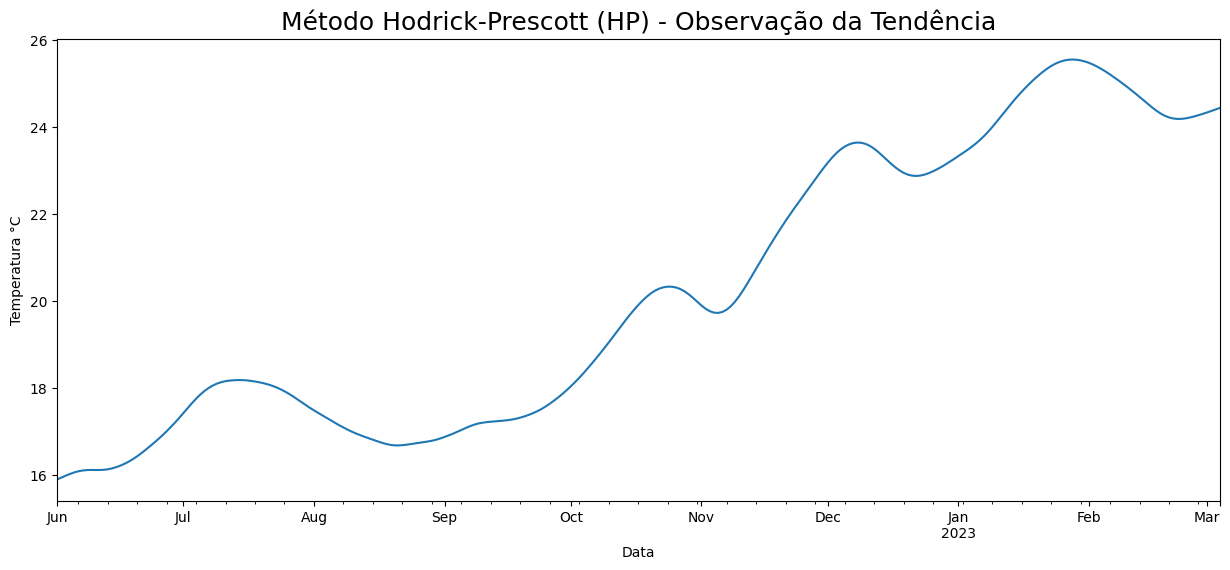

In [31]:
from statsmodels.tsa.filters.hp_filter import hpfilter
temperatura_jurere = temperatura_jurere.set_index(temperatura_jurere['Data'])
temp, tendencia = hpfilter(temperatura_jurere['Temperatura °C'], lamb=1600)
tendencia.plot(figsize=(15, 6)).autoscale(axis='x', tight=True)
plt.title(f'Método Hodrick-Prescott (HP) - Observação da Tendência', fontsize=18)
plt.ylabel('Temperatura °C');

* ### **Removendo a Tendência**

Detrending (termo em inglês) é o processo de remover a tendência em uma série temporal, extraindo a variação da média ao longo do tempo.

Os métodos mais utilizados são:
- Diferenciação
- Sinal
- Filtro HP

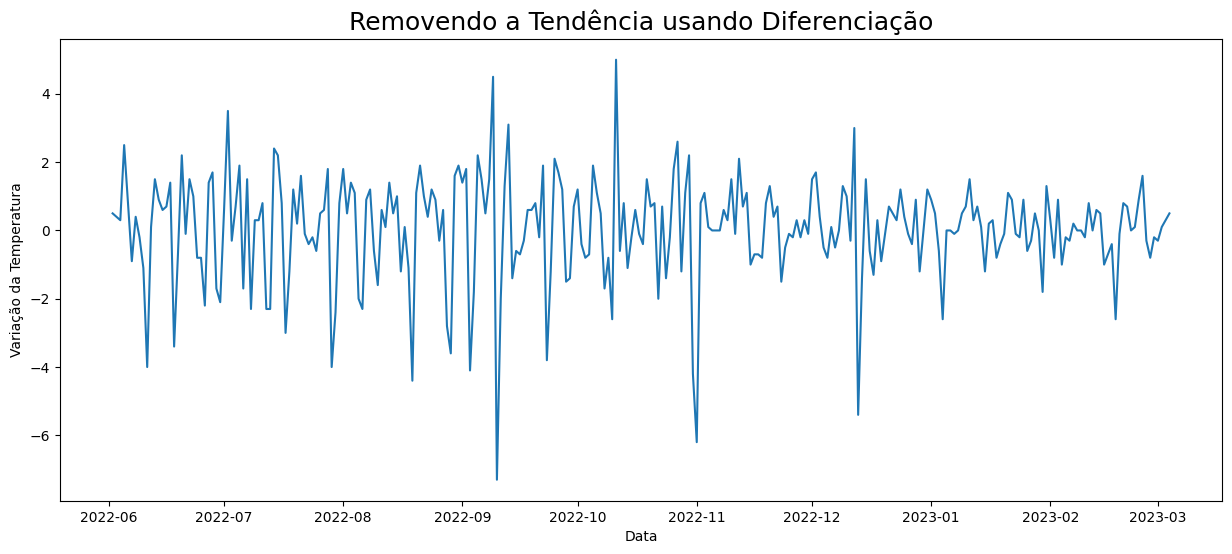

In [33]:
diff = temperatura_jurere['Temperatura °C'].diff()
plt.figure(figsize=(15, 6))
plt.plot(diff)
plt.title('Removendo a Tendência usando Diferenciação', fontsize=18)
plt.xlabel('Data')
plt.ylabel('Variação da Média de Temperatura');

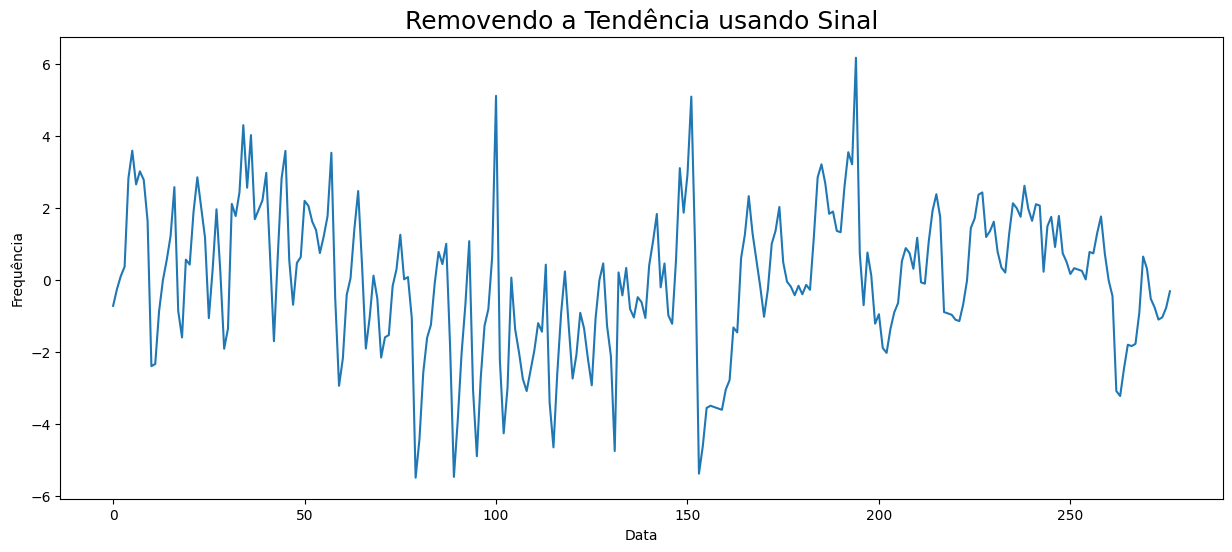

In [35]:
from scipy import signal
detrended = signal.detrend(temperatura_jurere['Temperatura °C'].values)
plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.xlabel('Data')
plt.ylabel('Frequência')
plt.title('Removendo a Tendência usando Sinal', fontsize=18);

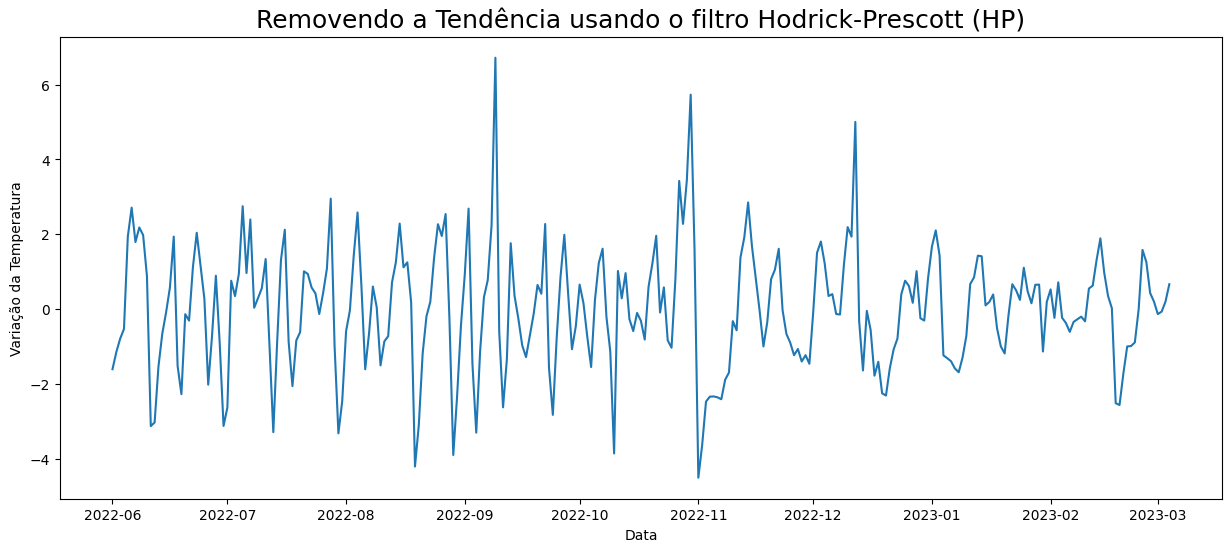

In [36]:
from statsmodels.tsa.filters.hp_filter import hpfilter
temperatura, tendencia = hpfilter(temperatura_jurere['Temperatura °C'], lamb=1600)
temperatura_jurere['Tendência'] = tendencia

detrended = temperatura_jurere['Temperatura °C'] - temperatura_jurere['Tendência']
plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.title('Removendo a Tendência usando o filtro Hodrick-Prescott (HP)', fontsize=18)
plt.xlabel('Data')
plt.ylabel('Variação da Temperatura');

* ### **Sazonalidade**

A sazonalidade é uma flutuação periódica onde o mesmo padrão ocorre em um intervalo regular de tempo. 

É uma característica da economia, clima, do mercado de ações e dados de série temporal.

Em outras indústrias, muitos fenômenos são caracterizados por efeitos sazonais periodicamente recorrentes. 

Por exemplo, as vendas no varejo tendem a aumentar durante Natal e Ano Novo e diminuir no inverno.

Os seguintes métodos podem ser usados para detectar sazonalidade:
- Gráficos de caixas
- Gráficos de autocorrelação

**Gráfico de Caixa**

O gráfico de caixa serve para representar dados espalhados por um intervalo além mostrar:

- o valor mínimo
- primeiro quartil
- mediana
- terceiro quartil 
- valor máximo

Quartil é um termo no campo da estatística que representa a divisão do conjunto de dados em partes iguais.

- O círculo representa "Outliers" (Valores discrepantes/extremos)
- IQR (Inter-quartil): Valores entre o 1º e 3º quartil
- Valor máximo
- Terceiro quartil (75% ou 3/4)
- Mediana (50% ou 1/2) (Segundo quartil)
- Primeiro quartil (25% ou 1/4)
- Valor mínimo

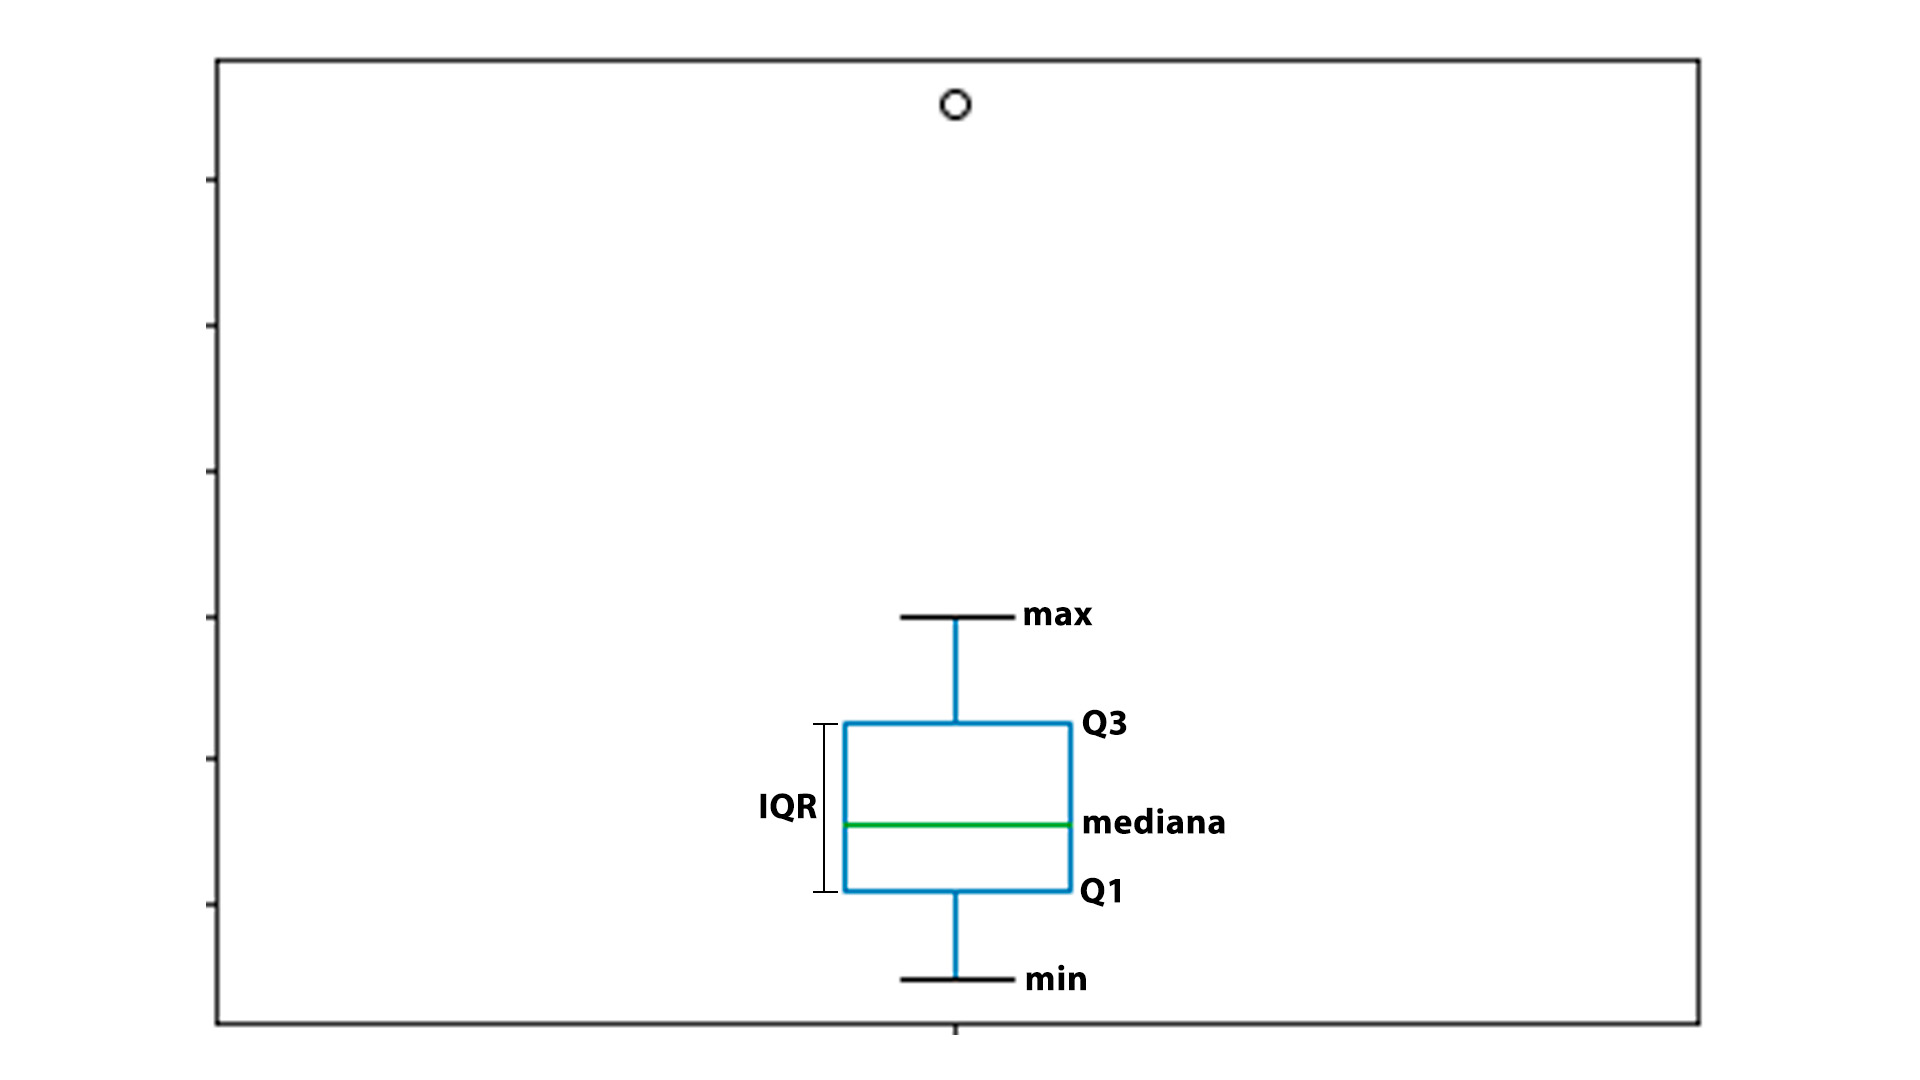

In [41]:
Image(filename='imagens/boxplot.jpg')

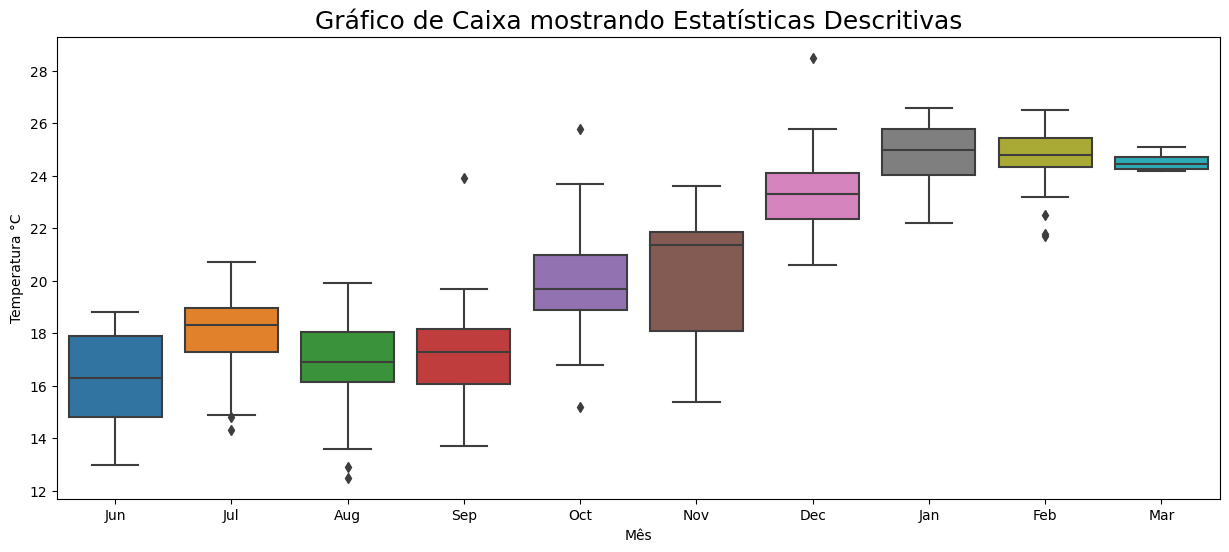

In [40]:
import seaborn as sns
temperatura_jurere['Mês'] = temperatura_jurere['Data'].dt.strftime('%b')
temperatura_jurere['Ano'] = [d.year for d in temperatura_jurere.Data]
temperatura_jurere['Mês'] = [d.strftime('%b') for d in temperatura_jurere.Data]
anos = temperatura_jurere['Ano'].unique()
plt.figure(figsize=(15, 6))
sns.boxplot(x='Mês', y='Temperatura °C', data=temperatura_jurere)
plt.title('Gráfico de Caixa mostrando Estatísticas Descritivas', fontsize=18);

**Gráfico de Autocorrelação**

A autocorrelação é usada para verificar a aleatoriedade nos dados. 

Ajuda a identificar tipos de dados em que o período não é conhecido. 

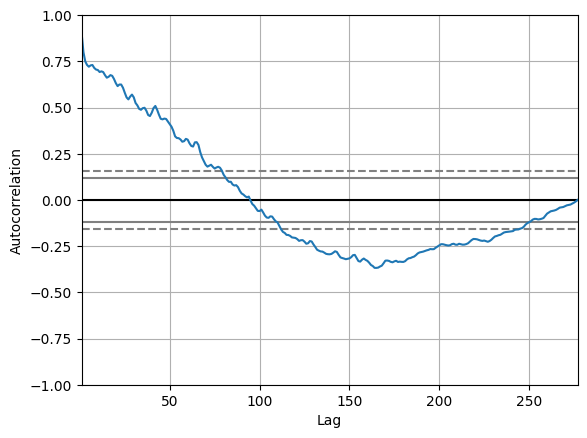

In [43]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temperatura_jurere['Temperatura °C'].tolist());

* ### **Removendo a Sazonalidade**

Os dados de séries temporais contêm quatro componentes principais:

- **Nível:** Valor médio dos dados de séries temporais.
- **Tendência:** Significa um valor crescente ou decrescente em dados de séries temporais.
- **Temonalidade:** Significa repetir o padrão de um ciclo em dados de séries temporais.
- **Ruído:** Significa uma variação aleatória nos dados da série temporal.

* #### **Decomposição sazonal**

Decomposição é o processo de compreensão de generalizações e problemas relacionados à previsão das séries temporais. 

Podemos utilizar decomposição sazonal para remover a sazonalidade dos dados e verificar apenas os dados com a tendência, variações cíclicas e irregulares.

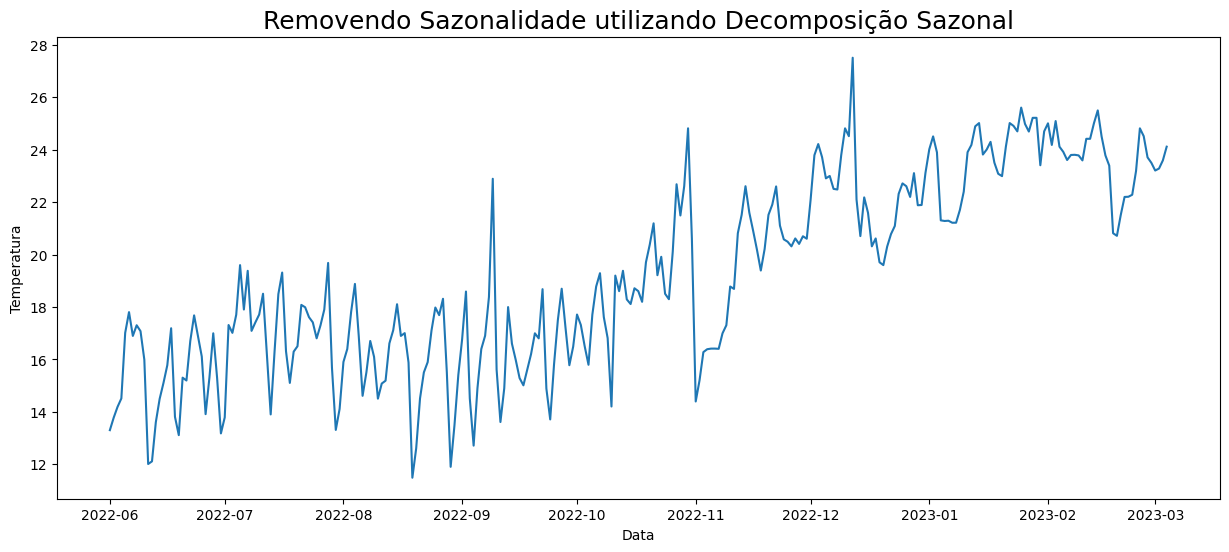

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(temperatura_jurere['Temperatura °C'],
                                model='multiplicative', extrapolate_trend='freq')
deseason = temperatura_jurere['Temperatura °C'] - result_mul.seasonal
plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Removendo Sazonalidade utilizando Decomposição Sazonal', fontsize=18)
plt.xlabel('Data')
plt.ylabel('Temperatura');

* ### **Variações Cíclicas**

Componentes cíclicos são flutuações em torno de uma longa tendência observada a cada poucas unidades de tempo. 

Esse comportamento é menos frequente em comparação com a sazonalidade. 

É um processo recorrente em uma série temporal no campo dos negócios/economia.

Exemplos de variações cíclicas:

- **Prosperidade:** Quando as organizações prosperam, os preços aumentam, mas os benefícios também aumentam. 
Por outro lado, a prosperidade também causa excesso de desenvolvimento, desafios no transporte, incrementos na taxa de salário,
insuficiência em  mão-de-obra de trabalho, altas taxas de retorno, deficiência de dinheiro nas concessões de mercado e preços,
levando à depressão.

- **Depressão:** Quando ocorre depressão no mercado ou governo, empresas são fechadas, o desemprego se espalha e os salários e custos são baixos.

- **Acessibilidade:** Isso causa idealidade de dinheiro, acessibilidade de dinheiro com juros baixos, aumento em demanda por bens ou consumo, aumento de mercadorias e empreendimentos populares.

* #### **Detectando Variações Cíclicas**

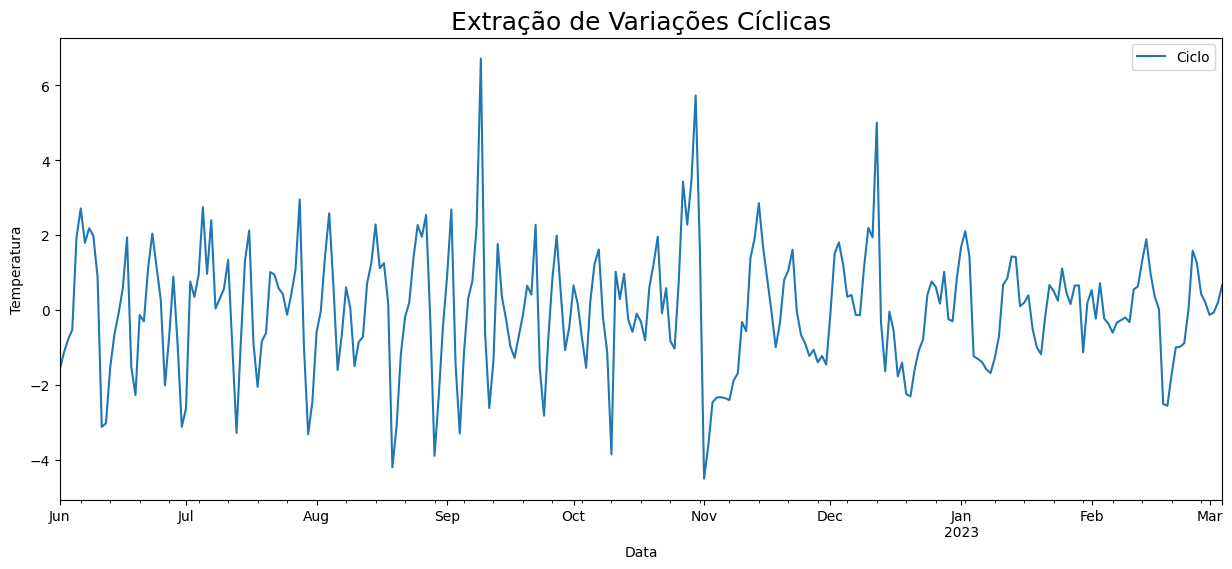

In [45]:
from statsmodels.tsa.filters.hp_filter import hpfilter
ciclo, tendencia = hpfilter(temperatura_jurere['Temperatura °C'], lamb=1600)
temperatura_jurere['Ciclo'] = ciclo
temperatura_jurere['Tendência'] = tendencia
temperatura_jurere[['Ciclo']].plot(figsize=(15, 6)).autoscale(axis='x', tight=True)
plt.title('Extração de Variações Cíclicas', fontsize=18)
plt.xlabel('Data')
plt.ylabel('Temperatura');

* ### **Erros, variações inesperadas, e resíduos**

Quando as variações de tendência e cíclica são removidas dos dados da série temporal, os padrões deixados para trás que não podem ser explicados são chamados de erros, variações inesperadas, ou resíduos. 

Vários métodos estão disponíveis para verificar variações irregulares, como:
- Teoria de probabilidade, 
- Médias móveis 
- Métodos autoregressivos 

Se pudermos encontrar alguma variação cíclica nos dados, isso é considerado parte dos resíduos. 

Essas variações que ocorrem devido a circunstâncias inesperadas, são chamadas de variações inesperadas ou erros imprevisíveis.

* #### **Decomposição de Séries Temporais em seus Componentes**

A decomposição é um método usado para isolar os dados de séries temporais em
diferentes elementos, como tendências, sazonalidade, variação cíclica e
resíduos. 

Podemos alavancar a decomposição sazonal de um modelo de estatísticas
extraindo variações cíclicas usando um filtro HP para decompor os dados em suas partes constituintes, considerando as séries como
aditivo ou multiplicativo.

• Tendências (t (t)) significa um aumento ou diminuição no valor dos dados TS.

• Temonalidade (s [t]) significa repetir um ciclo de curto prazo de dados TS.

• Variações cíclicas (c [t]) significa uma flutuação em longa Tendências dos dados TS.

• Resíduos (e [t]) significam uma variação irregular dos dados de TS.

O modelo aditivo funciona com tendências lineares de dados de séries temporais, como
muda constantemente com o tempo. 

A fórmula do modelo aditivo é o seguinte:

Y [t] = t [t] + s [t] + c [t] + e [t]

O modelo multiplicativo funciona com um tipo de dados não lineares, como
quadriculado ou exponencial. A fórmula do modelo multiplicativo é a seguinte:

Y [t] = t [t] * s [t] * c [t] * e [t]

O exemplo a seguir descreve os modelos aditivos e multiplicativos:

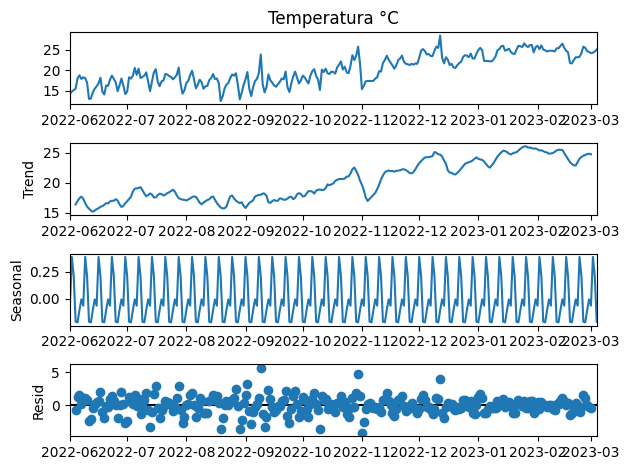

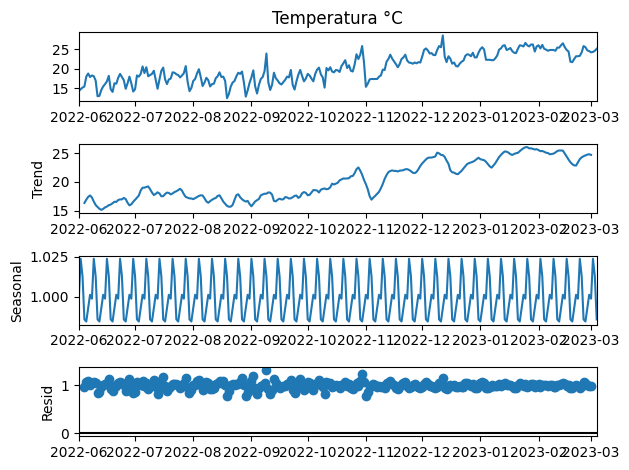

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(temperatura_jurere['Temperatura °C'], model='add')
result.plot()
result = seasonal_decompose(temperatura_jurere['Temperatura °C'], model='mul')
result.plot();

## **Conclusão**

Neste artigo, introduzimos o que são dados de séries temporais e utilizamos várias técnicas para isolar seus componentes (tendência,
sazonalidade, variações cíclicas, erros, etc).

Os métodos apresentados; e outros, são utilizados para extrair insights e conhecimentos de negócios, objetivando a otimização de qualquer empreendimento que registre dados temporais.